In [2]:
import os
import pandas as pd
import numpy as np
import pylab as py
import warnings
import matplotlib.pyplot as plt
from  matplotlib import rc
from matplotlib.colors import LogNorm
from matplotlib import font_manager
import matplotlib
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text',usetex=True)
from scipy.interpolate import interp1d
#from scipy.interpolate import make_interp_spline as spline
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
from matplotlib.ticker import ScalarFormatter,MaxNLocator,LogLocator,NullFormatter,FuncFormatter
warnings.filterwarnings('ignore')
import matplotlib.font_manager
from matplotlib.ticker import MultipleLocator, FormatStrFormatter,AutoMinorLocator
from matplotlib.pyplot import gca

In [3]:
# Get Data 
path2dat = "../plot_data/"
datalst = os.listdir(path2dat)

In [30]:
path2data2 = "../expdata/RHIC/"
datalst2 = os.listdir(path2data2)

In [31]:
for address in datalst:
    if('pp' in address):
        df_pp = pd.read_csv(path2dat+address, delimiter = ',', delim_whitespace=True)
    if('Au1' in address):
        df_Au1 = pd.read_csv(path2dat+address, delimiter = ',',delim_whitespace=True)
    if('Au2' in address):
        df_Au2 = pd.read_csv(path2dat+address, delimiter = ',',delim_whitespace=True)

In [32]:
for address in datalst2:
    if('Ratio_pgoing' in address):
        df_Rpgoing = pd.read_csv(path2data2+address, delimiter = ',', delim_whitespace=False)
    if('Ratio_Augoing' in address):
        df_RAugoing = pd.read_csv(path2data2+address, delimiter = ',',delim_whitespace=False)

In [62]:
df_pp["FUU"]

0    11.223287
1     5.505094
2     2.176742
3     0.675761
4     0.163223
Name: FUU, dtype: float64

In [63]:
df_Au1["FUU"] # blue: Au going

0    12.792776
1     6.110507
2     2.200909
3     0.651644
4     0.113626
Name: FUU, dtype: float64

In [64]:
df_Au1["FUU"]/df_pp["FUU"]

0    1.139842
1    1.109973
2    1.011102
3    0.964311
4    0.696141
Name: FUU, dtype: float64

In [36]:
df_RAugoing.head(10)

,pT,RpAU,Error
0,0.5,1.000,0.26350
1,1.5,0.781,0.22750
2,2.5,0.656,0.35700
3,3.5,1.010,0.53500
4,4.5,0.502,0.41865


In [16]:
CX = "CX"
pt = "pt"
err = "ERR"

In [17]:
CX2 = "CX"
pt2 = "pt"
err2 = "ERR"

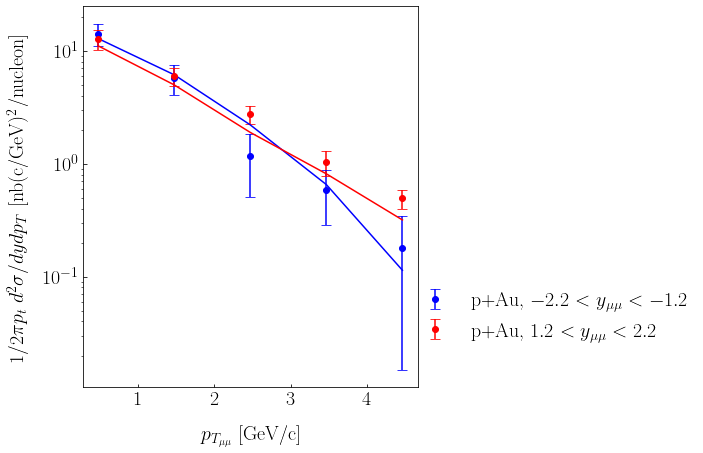

In [20]:
fig, axs = plt.subplots(1, 1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})

axs.errorbar(df_Au1[pt], df_Au1[CX], yerr= df_Au1[err], fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm p+Au, $-2.2 < y_{\mu\mu} < -1.2$ ")
axs.errorbar(df_Au2[pt], df_Au2[CX], yerr= df_Au2[err], fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm p+Au, $1.2 < y_{\mu\mu} < 2.2$  ")

#axs.errorbar(df_pp[pt2],  df_pp[CX2], yerr= df_pp[err2], fmt = "o",color = "black", ecolor = "black", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm p+p, $1.2 < |y_{\mu\mu} | < 2.2$")

axs.plot(df_Au1[pt2], (df_Au1["FUU"]), color = "blue")
axs.plot(df_Au2[pt2], (df_Au2["FUU"]), color = "red")

#axs.plot(df_pp[pt2], (df_pp["FUU"]), color = "black")

axs.set_yscale("log")
#axs.set_ylim(0.5*10**(-4),0.05)
axs.tick_params(axis = 'both', direction ='in',labelsize = 20)

fig.set_size_inches(6,7)

axs.legend(frameon = False,fontsize = 20,loc='upper center', bbox_to_anchor=(1.4, 0.3))
axs.set_xlabel(r"\rm $p_{T_{\mu\mu}} $ [GeV/c]", fontsize = 20,rotation = 0,labelpad = 15)
axs.set_ylabel(r"\rm $1/2 \pi p_t \ d^2 \sigma / dydp_T $ [nb(c/GeV$)^2$/nucleon]", fontsize = 20,rotation = 90,labelpad = 15)

plt.show()

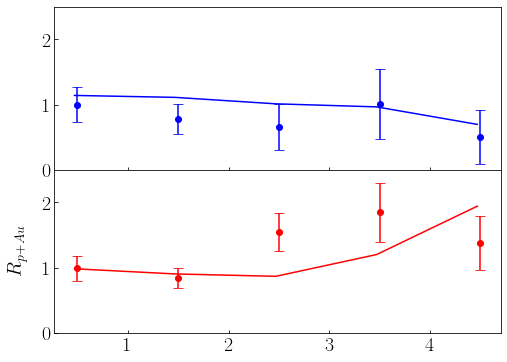

In [67]:
fig2, axs2 = plt.subplots(2, 1, sharex='col', sharey='row',
                        gridspec_kw={'hspace': 0, 'wspace': 0})
axs2[0].errorbar(df_RAugoing["pT"], df_RAugoing["RpAU"], yerr= df_RAugoing["Error"], fmt = "o",color = "blue", ecolor = "blue", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm p+Au, $1.2 < y_{\mu\mu} < 2.2$  ")
axs2[1].errorbar(df_Rpgoing["pT"], df_Rpgoing["RpAU"], yerr= df_Rpgoing["Error"], fmt = "o",color = "red", ecolor = "red", uplims=False, lolims=False, capsize = 5, capthick =0.8, barsabove = False,label = r"\rm p+Au, $-2.2 < y_{\mu\mu} < -1.2$ ")

axs2[0].set_ylim(0,2.5)
axs2[1].set_ylim(0,2.5)

axs2[0].plot(df_Au1[pt2], (df_Au1["FUU"]/df_pp["FUU"]), color = "blue")
axs2[1].plot(df_Au1[pt2], (df_Au2["FUU"]/df_pp["FUU"]), color = "red")

axs2[0].tick_params(axis = 'both', direction ='in',labelsize = 20)
axs2[1].tick_params(axis = 'both', direction ='in',labelsize = 20)

axs2[0].set_xlabel(r"\rm $p_{T_{\mu\mu}} $ [GeV/c]", fontsize = 20,rotation = 0,labelpad = 15)
axs2[1].set_ylabel(r"\rm $R_{p+Au}$", fontsize = 20,rotation = 90,labelpad = 15)


fig2.set_size_inches(8,6)



In [30]:
fig.savefig('RHIC.pdf', bbox_inches = "tight")

In [68]:
fig2.savefig('RHIC_Ratios.pdf', bbox_inches = "tight")